# Instalacja pakietów i przygotowanie datasetu

In [207]:
!pip install kaggle
!pip install pandas
!pip install numpy

In [208]:
!kaggle datasets download -d karangadiya/fifa19


  0%|          | 0.00/2.18M [00:00<?, ?B/s]
 46%|####5     | 1.00M/2.18M [00:00<00:00, 4.74MB/s]
 92%|#########1| 2.00M/2.18M [00:00<00:00, 5.31MB/s]
100%|##########| 2.18M/2.18M [00:00<00:00, 5.93MB/s]


In [209]:
import zipfile

with zipfile.ZipFile('fifa19.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Normalizacja i usuwanie artefaktów

In [210]:
#Usuwanie artefaktów
df=pd.read_csv('data.csv')
df = df[df["Release Clause"].notna()]
df = df[df["Release Clause"].notnull()]
df.to_csv('data.csv')

In [211]:
#Normalizacja
df=pd.read_csv('data.csv')
if df["Overall"].mean() > 1:
    df["Overall"]= df["Overall"]/100 
df["Release Clause"] = df["Release Clause"].str.replace("€", "")

df["Release Clause"] = (df["Release Clause"].replace(r'[KM]+$', '', regex=True).astype(float) * 
          df["Release Clause"].str.extract(r'[\d\.]+([KM]+)', expand=False)
          .replace(['K','M'], [1000, 1000000]).astype(int))
df.to_csv('data.csv')

# Podział na train/dev/test

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('data.csv')
train, dev = train_test_split(df, train_size=0.6, test_size=0.4, shuffle=True)
dev, test = train_test_split(dev,  train_size=0.5, test_size=0.5, shuffle=False)

test.to_csv('test.csv') 
dev.to_csv('dev.csv') 
train.to_csv('train.csv')

# Odczyt danych

In [213]:
import pandas as pd

data = pd.read_csv('data.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dev = pd.read_csv('dev.csv')

print(f"Test dataset length: {len(test)}")
print(f"Dev dataset length: {len(dev)}")
print(f"Train dataset length: {len(train)}")
print(f"Whole dataset length: {len(data)}")

Test dataset length: 3329
Dev dataset length: 3329
Train dataset length: 9985
Whole dataset length: 16643


In [214]:
data

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1      ID                Name  \
0               0             0               0  158023            L. Messi   
1               1             1               1   20801   Cristiano Ronaldo   
2               2             2               2  190871           Neymar Jr   
3               3             3               3  193080              De Gea   
4               4             4               4  192985        K. De Bruyne   
...           ...           ...             ...     ...                 ...   
16638       16638         18202           18202  238813        J. Lundstram   
16639       16639         18203           18203  243165  N. Christoffersson   
16640       16640         18204           18204  241638           B. Worman   
16641       16641         18205           18205  246268      D. Walker-Rice   
16642       16642         18206           18206  246269           G. Nugent   

       Age                                           Photo Nationality  \
0       31  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       33   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2       26  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3       27  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4       27  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...    ...                                             ...         ...   
16638   19  https://cdn.sofifa.org/players/4/19/238813.png     England   
16639   19  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
16640   16  https://cdn.sofifa.org/players/4/19/241638.png     England   
16641   17  https://cdn.sofifa.org/players/4/19/246268.png     England   
16642   16  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  ...  Composure Marking  \
0      https://cdn.sofifa.org/flags/52.png     0.94  ...       96.0    33.0   
1      https://cdn.sofifa.org/flags/38.png     0.94  ...       95.0    28.0   
2      https://cdn.sofifa.org/flags/54.png     0.92  ...       94.0    27.0   
3      https://cdn.sofifa.org/flags/45.png     0.91  ...       68.0    15.0   
4       https://cdn.sofifa.org/flags/7.png     0.91  ...       88.0    68.0   
...                                    ...      ...  ...        ...     ...   
16638  https://cdn.sofifa.org/flags/14.png     0.47  ...       45.0    40.0   
16639  https://cdn.sofifa.org/flags/46.png     0.47  ...       42.0    22.0   
16640  https://cdn.sofifa.org/flags/14.png     0.47  ...       41.0    32.0   
16641  https://cdn.sofifa.org/flags/14.png     0.47  ...       46.0    20.0   
16642  https://cdn.sofifa.org/flags/14.png     0.46  ...       43.0    40.0   

      StandingTackle SlidingTackle GKDiving  GKHandling GKKicking  \
0               28.0          26.0      6.0        11.0      15.0   
1               31.0          23.0      7.0        11.0      15.0   
2               24.0          33.0      9.0         9.0      15.0   
3               21.0          13.0     90.0        85.0      87.0   
4               58.0          51.0     15.0        13.0       5.0   
...              ...           ...      ...         ...       ...   
16638           48.0          47.0     10.0        13.0       7.0   
16639           15.0          19.0     10.0         9.0       9.0   
16640           13.0          11.0      6.0         5.0      10.0   
16641           25.0          27.0     14.0         6.0      14.0   
16642           43.0          50.0     10.0        15.0       9.0   

       GKPositioning  GKReflexes  Release Clause  
0               14.0         8.0     226500000.0  
1               14.0        11.0     127100000.0  
2               15.0        11.0     228100000.0  
3               88.0        94.0     138600000.0  
4               10.0        13.0     196400000.0  
...              ...         ...             ...  
16638            8.0         9.0  

# Minimum, maksimum, średnia, mediana, odchylenie standardowe

In [217]:
overall = data["Overall"]
print("Overall zawodnika (0-1):")
print(f"Minimum: {overall.min()}")
print(f"Maksimum: {overall.max()}")

print(f"Średnia: {overall.mean()}")
print(f"Mediana: {overall.median()}")
print(f"Odchylenie standardowe: {overall.std()}")

Overall zawodnika (0-1):
Minimum: 0.46
Maksimum: 0.94
Średnia: 0.6616277113501784
Mediana: 0.66
Odchylenie standardowe: 0.07008236149926617


In [218]:
age = data["Age"]
print("Wiek zawodnika:")
print(f"Minimum: {age.min()}")
print(f"Maksimum: {age.max()}")

print(f"Średnia: {age.mean()}")
print(f"Mediana: {age.median()}")
print(f"Odchylenie standardowe: {age.std()}")

Wiek zawodnika:
Minimum: 16
Maksimum: 45
Średnia: 25.226221234152497
Mediana: 25.0
Odchylenie standardowe: 4.71658785571582


## Liczba zawodników dla poszczególnych narodowości (top 10)

<AxesSubplot:>

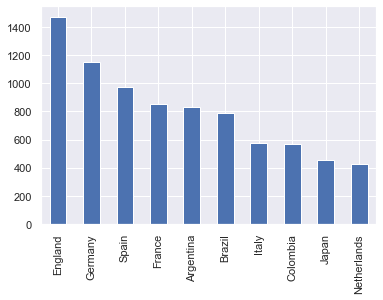

In [219]:
data["Nationality"].value_counts().head(10).plot(kind="bar")

## Top 10 najlepszych i najgorszych drużyn względem średniego Overall

In [220]:
data[["Club", "Overall"]].groupby("Club").mean().sort_values("Overall", ascending=False).head(10)

Overall
Club                         
Juventus             0.822800
Napoli               0.800417
Inter                0.796190
Real Madrid          0.782424
FC Barcelona         0.780303
Milan                0.775417
Paris Saint-Germain  0.774333
Roma                 0.774000
Manchester United    0.772424
SL Benfica           0.770741

In [224]:
data[["Club", "Overall"]].groupby("Club").mean().sort_values("Overall", ascending=False).tail(10)

Overall
Club                            
St. Patrick's Athletic  0.577826
Cambridge United        0.572593
Waterford FC            0.570000
Morecambe               0.569600
Crewe Alexandra         0.566667
Sligo Rovers            0.566316
Derry City              0.555882
Bohemian FC             0.550000
Limerick FC             0.545263
Bray Wanderers          0.536522

# Top 10 klauzul uwolnienia

In [227]:
data.sort_values("Release Clause").tail(10)["Name"]

29            Isco
11        T. Kroos
16         H. Kane
7        L. Suárez
17    A. Griezmann
25       K. Mbappé
5        E. Hazard
4     K. De Bruyne
0         L. Messi
2        Neymar Jr
Name: Name, dtype: object

## Zależność między wiekiem a overall zawodników dla top 10 klubów

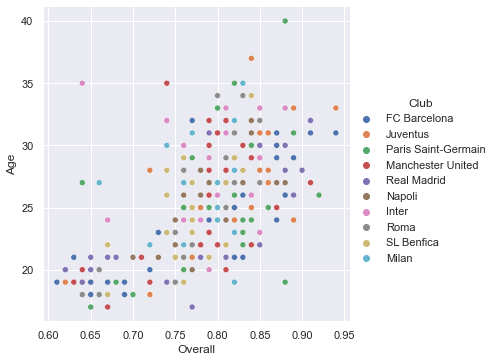

In [228]:
import seaborn as sns
sns.set_theme()

#Wyświetlenie danych tylko dla top 10 klubów względem overall
clubs = data[["Club", "Overall"]].groupby("Club", as_index=False).mean().sort_values("Overall", ascending=False).head(10)["Club"]

data[data["Club"].isin(clubs)]
sns.relplot(data=data[data["Club"].isin(clubs)], x="Overall", y="Age", hue="Club")